<a href="https://colab.research.google.com/github/BimalShrestha/data-process-and-visualization-/blob/main/EXAM1dpv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXAM1
# Bimal Shrestha
# Data Visualization (CPSMA 4313)

Importing libraries

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


now authenticating 

In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Gathering the table on 8000 km mountains from the wikipedia page of mountains by elevation

storing data as a pandas as df

In [4]:
rawData = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation#8,000_metres')
content = rawData.text
soup = BeautifulSoup(content,'lxml')
tables = soup.find_all('table',class_="wikitable")[0]
df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


Returning 'himalayas' range mountains

In [5]:
df[df.Range == 'Himalayas']

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


Barchart of the Ranges

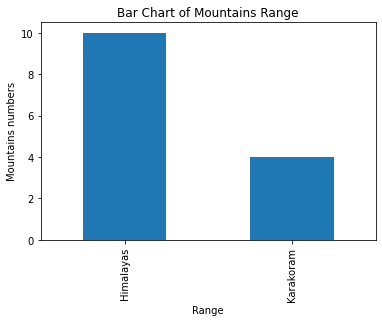

In [6]:
dfplot = df.groupby(['Range'])['Range'].count()
dfplot.plot(kind="bar", title = 'Bar Chart of Mountains Range' , ylabel = 'Mountains numbers', xlabel = 'Range')

Creating a box-plot of the height in Feet


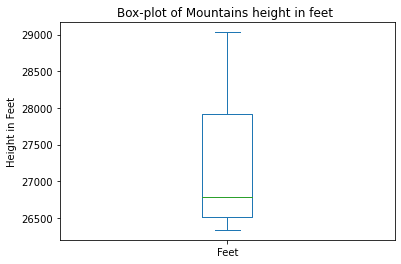

In [7]:
df.Feet.plot(kind ='box', title = 'Box-plot of Mountains height in feet ', ylabel = 'Height in Feet')

Mean, standard deviation and five number summary of the height in Feet

In [8]:
df.Feet.describe()

count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

mean and median of mountains when grouped by their Range.

In [10]:
mean = df.groupby('Range').mean()
mean
median = df.groupby('Range').median()
median

,Metres,Feet
Range,,
Himalayas,8177.5,26829.5
Karakoram,8065.5,26461.5


Use BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface

In [12]:
%%bigquery --project data-viz-bimal-shrestha
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


There were 198792903 rows are in the dataset.


Average trips based on payment type

In [13]:
%%bigquery --project data-viz-bimal-shrestha
SELECT payment_type as payment_type, AVG(trip_total) as avg_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE payment_type is not null
GROUP BY payment_type

,payment_type,avg_trip_total
0,Mobile,20.339910
1,Unknown,17.649893
2,No Charge,15.836177
3,Prepaid,22.377662
4,Credit Card,20.524892
5,Prcard,20.320682
6,Pcard,10.116931
7,Dispute,15.496588
8,Way2ride,16.639366
9,Split,18.788039


trips that had non-zero recorded time that were above the average time

In [14]:
%%bigquery --project data-viz-bimal-shrestha 
SELECT COUNT(*) as no_of_non_zero_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds != 0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_time FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,no_of_non_zero_trips_above_avg_time
0,62143014


Questions about the exam
(a) Approximately how long did you work on this exam?

Ans: I think it took me about 3 hours. I Started it on friday but i took my time. 

(b) Which was the hardest and easiest topic from this section?

Ans: The hardest part is for sure to find the trips that had non-zero recorded time that were above the average time. The easiest was to calculate rows. 

(c) Which method of gathering data are you most excited to use again

Ans: Pandas.

# References:

https://github.com/nurfnick/Data_Viz

https://github.com/BimalShrestha/data-process-and-visualization-

https://en.wikipedia.org/wiki/List_of_mountains_by_elevation

https://www.pythonprogramming.in

https://stackoverflow.com/
